<a href="https://colab.research.google.com/github/dominikjanyga/data-science-notes/blob/main/Chapter_2_gridded_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
os.chdir("c:/Users/Dominik/data-science/data-science-notes")   

In [3]:
porosity_ld_array = np.fromfile("datasets/porosity_truth_map.dat")
print(str(type(porosity_ld_array)))

<class 'numpy.ndarray'>


In [4]:
#check the size and dimensions of ndarrays
porosity_ld_array.shape

(10000,)

In [ ]:
#reshape ndarrays - restore the loaded 1d ndarray to a 2d ndarray
#the inputs are the original array and the new shape as int or tuple of ints
#in 2D the standard python order is left to righe for each row from top to bottom
#it is possible to set the order to ='C' or 'F' for C-like or Fortran index respectively

In [8]:
porosity_map = np.reshape(porosity_ld_array,[100,100])
print('Shape of the porosity map: ' + str(porosity_map.shape) + '.')
ny = porosity_map.shape[0]
nx= porosity_map.shape[1]
print('2d array, number of x cells = ' + str(nx) + ', and y cells = ' + str(ny) + '.' )

Shape of the porosity map: (100, 100).
2d array, number of x cells = 100, and y cells = 100.


FLATTEN NDARRAYS

In [10]:
flatten_porosity_map = porosity_map.flatten()
flatten_porosity_map.shape

(10000,)

READ AND WRITE BINARY FILES


WRITE ASCII csv FILES

In [11]:
np.savetxt("porosity_map.csv", porosity_map, delimiter=",")

SLICING NDARRAYS

In [17]:
top_corner = porosity_map[:5,:5]
top_corner

array([[ 9.47058121,  9.91782937,  9.9798204 ,  9.91630812, 10.69861209],
       [ 8.67648753,  8.94498856,  9.26749403, 10.00263918, 11.01199005],
       [ 9.1385679 ,  8.93357916,  9.87751618, 10.90816458, 10.90930552],
       [ 8.33458609,  8.69512287,  9.28384749, 10.60923852, 11.52389143],
       [ 9.35914948,  9.91706874, 10.04941769, 10.77239282, 11.16107277]])

In [22]:
first_column = top_corner[:,0]
first_column

array([9.47058121, 8.67648753, 9.1385679 , 8.33458609, 9.35914948])

In [23]:
last_2_rows = top_corner[-2:,:]
last_2_rows

array([[ 8.33458609,  8.69512287,  9.28384749, 10.60923852, 11.52389143],
       [ 9.35914948,  9.91706874, 10.04941769, 10.77239282, 11.16107277]])

VISUALIZING NDARRAYS

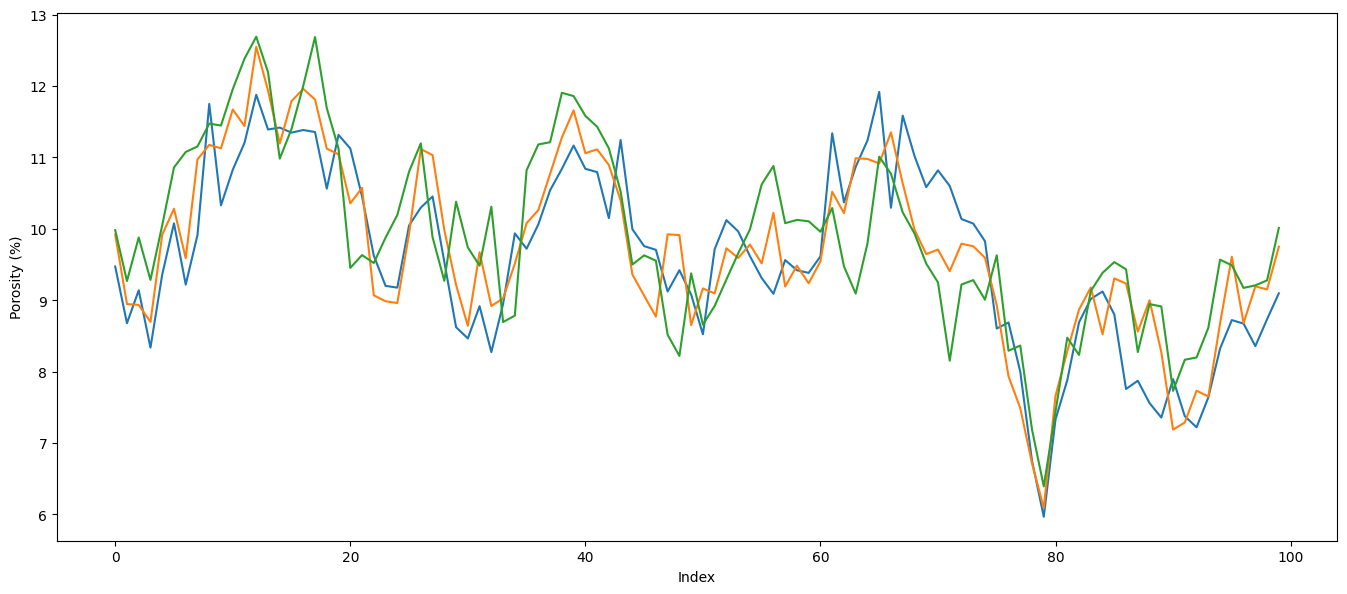

In [24]:
plt.plot(porosity_map[:,:3])
plt.xlabel('Index'); plt.ylabel('Porosity (%)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

In [26]:
xmin = 0.0;xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cell_size = 10.0; vmin = 4.0; vmax = 16.0; cmap = plt.cm.inferno

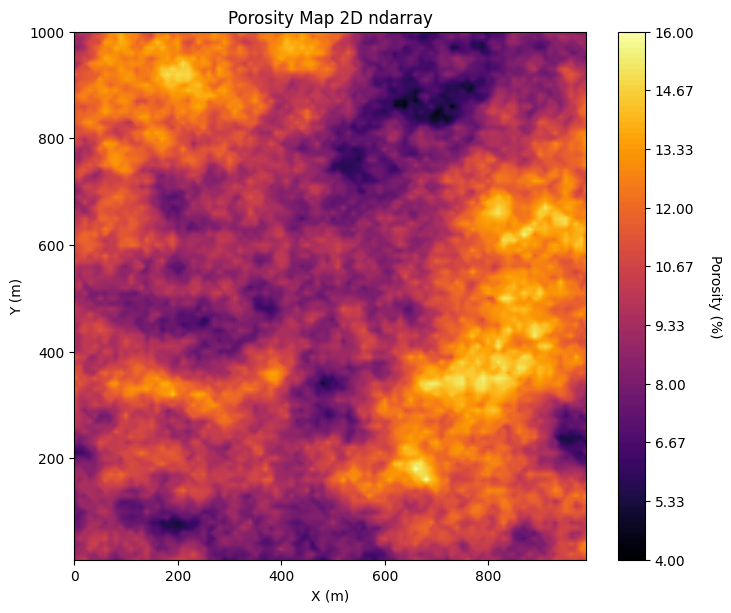

In [27]:
xx, yy = np.meshgrid(                           # make 2D ndarrays with x and y coordinates
  np.arange(xmin,xmax,cell_size), np.arange(ymax, ymin, -1 * cell_size)
)
im = plt.contourf(xx,yy,porosity_map,cmap=cmap,vmin=vmin,vmax=vmax, # contour plot
  levels=np.linspace(vmin, vmax, 100),
)
plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Porosity Map 2D ndarray') # label the axes
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10)) # make a color bar
cbar.set_label('Porosity (%)', rotation=270, labelpad=20) # label the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2) # set the plot scale
plt.show()        